# Modeldocumentatie 

## Problem definition

The problem that we are going to work on throughout document is the following:

You want to breed rainbowfish to sell to pet stores. You start with a nice big aquarium and 30 fish, half of them male, half of them female. You want to predict the number of fish after a number of days, to see how many you can sell.

### Sub-problem definition

Can we predict the number of rainbowfish in the aquarium after any number of days?

$$ \Delta{P} = 0.7P(t) \Delta(t) $$

Can we derive the differenatial equation?

$$ \frac{\partial P}{\partial t} = 0.7P(t) $$

In order to derive the growth line we need to calculate,

$$ P(t) = 30e^{0.7t} $$

### Sub-problem definition

We would like to add two factors to the problem. 
1. the aquarium is limited, so the the population cannot grow limitless. 
2. some of the fish will be sold. He, we need to finance this project in some way! 

So the new equation will look like this,

$$ \frac{dP}{dt} = 0.7P(1 - \frac {P}{750}) - 20 $$ whereby $$ P(0)=30 $$


In [2]:
# Program      : Euler's method for a system

import numpy as np
import matplotlib.pyplot as plt

print("Solution for dP/dt = 0.7*P-4*G, dG/dt = -0.55*G") 

Solution for dP/dt = 0.7*P-4*G, dG/dt = -0.55*G


## Euler's method

The differential equation for the rainbowfish that we have now, could still be solved by hand. It would give you the analytical solution, which is exact. However, we are not doing that in this course, as we want to focus on the modelling, and not on analytical solution methods. We also do not want to limit our models to equations that can be solved analytically.

So, we will approximate the solutions of the differential equation with a numerical method, and we choose Euler's method. 


In [3]:
# Initializations

f = 16                           #factor of steps 1 day / x days
Dt = 1/f                          # timestep Delta t
P_init = 1                      # initial population of P
G_init = 30                        # initial population of G
t_init = 0                        # initial time
t_end = 100*f                         # stopping time

n_steps = int(round((t_end-t_init)/Dt)) # total number of timesteps

X = np.zeros(2)                   # create space for current X=[P,G]^T
dXdt = np.zeros(2)                # create space for current derivative
t_arr = np.zeros(n_steps + 1)     # create a storage array for t
X_arr = np.zeros((2,n_steps+1))   # create a storage array for X=[P,G]^T
t_arr[0] = t_init                 # add the initial t to the storage array
X_arr[0,0] = P_init               # add the initial P to the storage array
X_arr[1,0] = G_init               # add the initial G to the storage array

In [4]:
# Euler's method

for i in range (1, n_steps + 1):
    t = t_arr[i-1]                 # load the time
    P = X_arr[0,i-1]               # load the value of P
    G = X_arr[1,i-1]               # load the value of G
    X[0] = P                       # fill current state vector X=[P,G]^T
    X[1] = G
    dPdt = 0.7*P-0.007*P**2 - 0.04*P*G             # calculate the derivative dP/dt
    dGdt = - 0.25*G+0.008*P*G                # calculate the derivative dG/dt
    dXdt[0] = dPdt                 # fill derivative vector dX/dt
    dXdt[1] = dGdt         
    Xnew = X + Dt*dXdt             # calculate X on next time step
    X_arr[:,i] = Xnew              # store Xnew 
    t_arr[i] = t + Dt              # store new t-value 

In [5]:
X_arr[0,4*f]

0.7383445260393985

## Plot the results

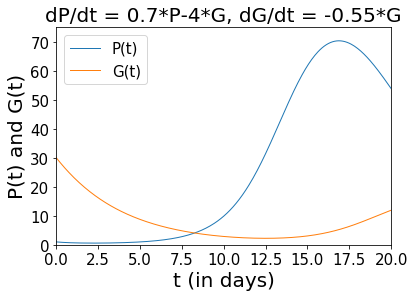

In [6]:
fig = plt.figure()
plt.plot(t_arr, X_arr[0,:], linewidth = 1, label="P(t)")  # plot P vs. time
plt.plot(t_arr, X_arr[1,:], linewidth = 1, label="G(t)")  # plot G vs. time

plt.title('dP/dt = 0.7*P-4*G, dG/dt = -0.55*G', fontsize = 20)  # set title
plt.xlabel('t (in days)', fontsize = 20)   # name of horizontal axis
plt.ylabel('P(t) and G(t)', fontsize = 20) # name of vertical axis

plt.xticks(fontsize = 15)               # adjust the fontsize
plt.yticks(fontsize = 15)               # adjust the fontsize
plt.axis([0, 20, 0, 75])                 # set the range of the axes

plt.legend(fontsize=15)                 # show the legend
plt.show()                              # necessary for some platforms

In [8]:
# save the figure as .jpg (other formats: png, pdf, svg, (ps, eps))
fig.savefig('Rainbowfish_Gourami.svg', dpi=fig.dpi, bbox_inches = "tight")

## Plot the phase plane

Convert the code of Eulers into a function

In [9]:
def eulers_function (P_init=1, G_init=30):
    # Initializations

    f = 16                           #factor of steps 1 day / x days
    Dt = 1/f                          # timestep Delta t
    P_init = P_init                      # initial population of P
    G_init = G_init                        # initial population of G
    t_init = 0                        # initial time
    t_end = 100*f                         # stopping time

    n_steps = int(round((t_end-t_init)/Dt)) # total number of timesteps

    X = np.zeros(2)                   # create space for current X=[P,G]^T
    dXdt = np.zeros(2)                # create space for current derivative
    t_arr = np.zeros(n_steps + 1)     # create a storage array for t
    X_arr = np.zeros((2,n_steps+1))   # create a storage array for X=[P,G]^T
    t_arr[0] = t_init                 # add the initial t to the storage array
    X_arr[0,0] = P_init               # add the initial P to the storage array
    X_arr[1,0] = G_init               # add the initial G to the storage array
    
    # Euler's method

    for i in range (1, n_steps + 1):
        t = t_arr[i-1]                 # load the time
        P = X_arr[0,i-1]               # load the value of P
        G = X_arr[1,i-1]               # load the value of G
        X[0] = P                       # fill current state vector X=[P,G]^T
        X[1] = G
        dPdt = 0.7*P-0.007*P**2 - 0.04*P*G             # calculate the derivative dP/dt
        dGdt = - 0.25*G+0.008*P*G                # calculate the derivative dG/dt
        dXdt[0] = dPdt                 # fill derivative vector dX/dt
        dXdt[1] = dGdt         
        Xnew = X + Dt*dXdt             # calculate X on next time step
        X_arr[:,i] = Xnew              # store Xnew 
        t_arr[i] = t + Dt              # store new t-value 
    
    return(X_arr)

Than apply the function with various initialization values

In [10]:
X_arr_20_5 = eulers_function(P_init=20, G_init=5)

In [11]:
X_arr_1_30 = eulers_function(P_init=1, G_init=30)

In [12]:
X_arr_120_1 = eulers_function(P_init=120, G_init=1)

In order to create a phase-plase we need to plot all various development based on the different initialization values

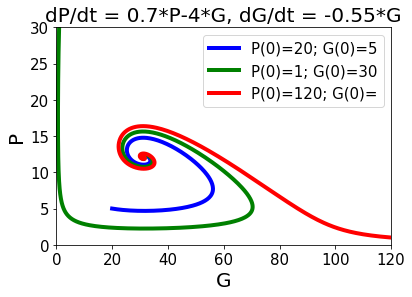

In [13]:
fig = plt.figure()
plt.plot(X_arr_20_5[0,:], X_arr_20_5[1,:], color="b" , linewidth = 4, label="P(0)=20; G(0)=5")  # plot P vs. G
plt.plot(X_arr_1_30[0,:], X_arr_1_30[1,:],color="g" , linewidth = 4, label="P(0)=1; G(0)=30")  # plot P vs. G
plt.plot(X_arr_120_1[0,:], X_arr_120_1[1,:],color="r" , linewidth = 4, label="P(0)=120; G(0)=")  # plot P vs. G

plt.title('dP/dt = 0.7*P-4*G, dG/dt = -0.55*G', fontsize = 20)  # set title
plt.xlabel('G', fontsize = 20)   # name of horizontal axis
plt.ylabel('P', fontsize = 20) # name of vertical axis

plt.xticks(fontsize = 15)               # adjust the fontsize
plt.yticks(fontsize = 15)               # adjust the fontsize
plt.axis([0, 120, 0, 30])                 # set the range of the axes

plt.legend(fontsize=15)                 # show the legend
plt.show()                              # necessary for some platforms

## Defining functions and use them in your documentation

Wouldn't it be awesome if we could define function?

In [14]:
def hello(name="everybody"):
    """ Greets a person """
    print("Hello " + name + " welkom tot Notebooks!")

print("The docstring of the function hello: " + hello.__doc__)

The docstring of the function hello:  Greets a person 


In [15]:
hello("Mira")

Hello Mira welkom tot Notebooks!


## How about storing the functions in seprate files?

It would even be more awesome if we could store and use already existing functions in your documentation. 

First assess, which environments variables are linked to this notebook and then check where the functions are placed.

In [16]:
import sys

In [17]:
sys.path

['c:\\Users\\R.BOS\\Downloads',
 'c:\\Users\\R.BOS\\.vscode\\extensions\\ms-python.python-2020.3.71659\\pythonFiles',
 'c:\\Users\\R.BOS\\.vscode\\extensions\\ms-python.python-2020.3.71659\\pythonFiles\\lib\\python',
 'C:\\Users\\R.BOS\\Miniconda3\\envs\\ML\\python36.zip',
 'C:\\Users\\R.BOS\\Miniconda3\\envs\\ML\\DLLs',
 'C:\\Users\\R.BOS\\Miniconda3\\envs\\ML\\lib',
 'C:\\Users\\R.BOS\\Miniconda3\\envs\\ML',
 '',
 'C:\\Users\\R.BOS\\Miniconda3\\envs\\ML\\lib\\site-packages',
 'C:\\Users\\R.BOS\\Miniconda3\\envs\\ML\\lib\\site-packages\\win32',
 'C:\\Users\\R.BOS\\Miniconda3\\envs\\ML\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\R.BOS\\Miniconda3\\envs\\ML\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\R.BOS\\Miniconda3\\envs\\ML\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\R.BOS\\.ipython']

## Assess folder in which the functions are listed

We downloaded the function, which was stored as a .py-file into our downloads folder. 
Now, we can load or import the .py-file into the notebook and call even the individual functions specfically

In [18]:
import printName

The docstring of the function hello:  Greets a person 
The docstring of the function hello2:  Greets a person 


In [19]:
from printName import hello

In [20]:
hello("Ruben")

Hello Ruben welkom tot Notebooks!


In [21]:
from printName import hello2

In [22]:
hello2("Mira")

Hello Mira welkom tot Notebooks! Nu hebben wij een specifieke functie ingeladen.


## What if we can play aroud with the functions by interacting with it? 

Let us first introduce the widgets to the notebook

In [23]:
import ipywidgets as widgets
from ipywidgets import interact

Here is an example of a slider

In [24]:
widgets.IntSlider(value=1,
    min=1,
    max=5.0,
    step=1)

IntSlider(value=1, max=5, min=1)

Here is an example of a dropdown list

In [26]:
widgets.Dropdown(
    options=[('Blue', "b"), ('Red', "r"), ('Yellow', "y")],
    value="b",
    description='Colour:',
)

Dropdown(description='Colour:', options=(('Blue', 'b'), ('Red', 'r'), ('Yellow', 'y')), value='b')

## How about combining the widgets with the graphs we created before?

First we need to define a function

In [27]:
def plot_func(colour, linewidth):
    fig = plt.figure()
    plt.plot(t_arr, X_arr[0,:], color=colour, linewidth = linewidth, label="P(t)",)  # plot P vs. time
    plt.plot(t_arr, X_arr[1,:], color="y", linewidth = 1, label="G(t)")  # plot G vs. time

    plt.title('dP/dt = 0.7*P-4*G, dG/dt = -0.55*G', fontsize = 20)  # set title
    plt.xlabel('t (in days)', fontsize = 20)   # name of horizontal axis
    plt.ylabel('P(t) and G(t)', fontsize = 20) # name of vertical axis

    plt.xticks(fontsize = 15)               # adjust the fontsize
    plt.yticks(fontsize = 15)               # adjust the fontsize
    plt.axis([0, 20, 0, 75])                 # set the range of the axes

    plt.legend(fontsize=15)                 # show the legend
    plt.show()                              # necessary for some platforms)

Now we can apply an interactive funtion, so we can play around with the graph

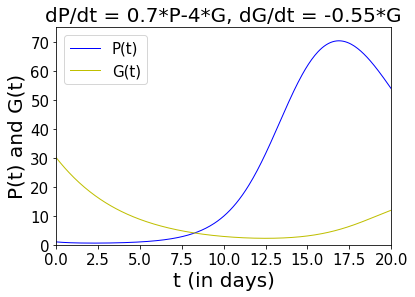

<function __main__.plot_func(colour, linewidth)>

In [28]:
interact(plot_func, colour = widgets.Dropdown(
    options=[('Blue', "b"), ('Red', "r"), ('Yellow', "y")],
    value="b",
    description='Colour:',
), linewidth = widgets.IntSlider(value=1,
    min=1,
    max=5.0,
    step=1))                          # necessary for some platforms)